# PSET1 - Object Oriented Programming

This problem set has only one part. You will be graded based on:

- Correct completion of the task.
- Your code is readable.
- Your names are logical and clear.

Hint: Build this problem set piece by piece.

## Problem description:

You work on a team of data scientists that regularly perform analysis and create many charts. Your boss has asked you to create a reusable piece of code that can perform most of this plotting without having to retype a lot of code. 

There are several functions you should make to perform this plotting, and you should encapuslate it all in a class called **Plot** that **takes your dataframe as input**. Here are the plotting functions it should have:

- **Box plots of all numeric features** - This function should find all the numeric features in your dataframe and construct a faceted plot (a grid or subplots). Each subplotplot should have the feature labeled and the larger plot should have a title.

- **Single scatter plot of two columns** - This function should take 2 column names and build a scatter plot for them. The axes labels and title should be auto generated.

- **Scatter matrix with extras** - This function should plot a scatter matrix with histograms plotted along the diagonal. In addition to the scatter matrix, the function should tell which columns were not able to be included in the scatter matrix. 


Note: You can use Matplotlib, Plotly, or Seaborn for this PSET. Also, each function should include **at least a basic docstring**.

## Demostrate completion:

In order to complete the PSET you will need to create your Class and then **demonstrate its usage**. Once you have created your class and functions, you should demonstrate their usage on the Titanic dataset in this repository's data directory.

Good luck!

In [25]:
# Your code here

In [10]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 3471-62C9

 Directory of C:\Users\mnkhz\Documents\GitHub\intermediate-python-fall-2023\Problem Sets

09/26/2023  12:35 PM    <DIR>          .
09/26/2023  11:48 AM    <DIR>          ..
09/20/2023  07:15 PM    <DIR>          .ipynb_checkpoints
09/12/2023  11:52 AM    <DIR>          data
09/21/2023  12:56 PM         4,903,253 pset0.ipynb
09/26/2023  12:35 PM            29,377 pset1.ipynb
               2 File(s)      4,932,630 bytes
               4 Dir(s)  374,929,457,152 bytes free


In [20]:
import pandas as pd

In [22]:
dataframe = pd.read_csv('./data/titanic.csv')

In [23]:
dataframe.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


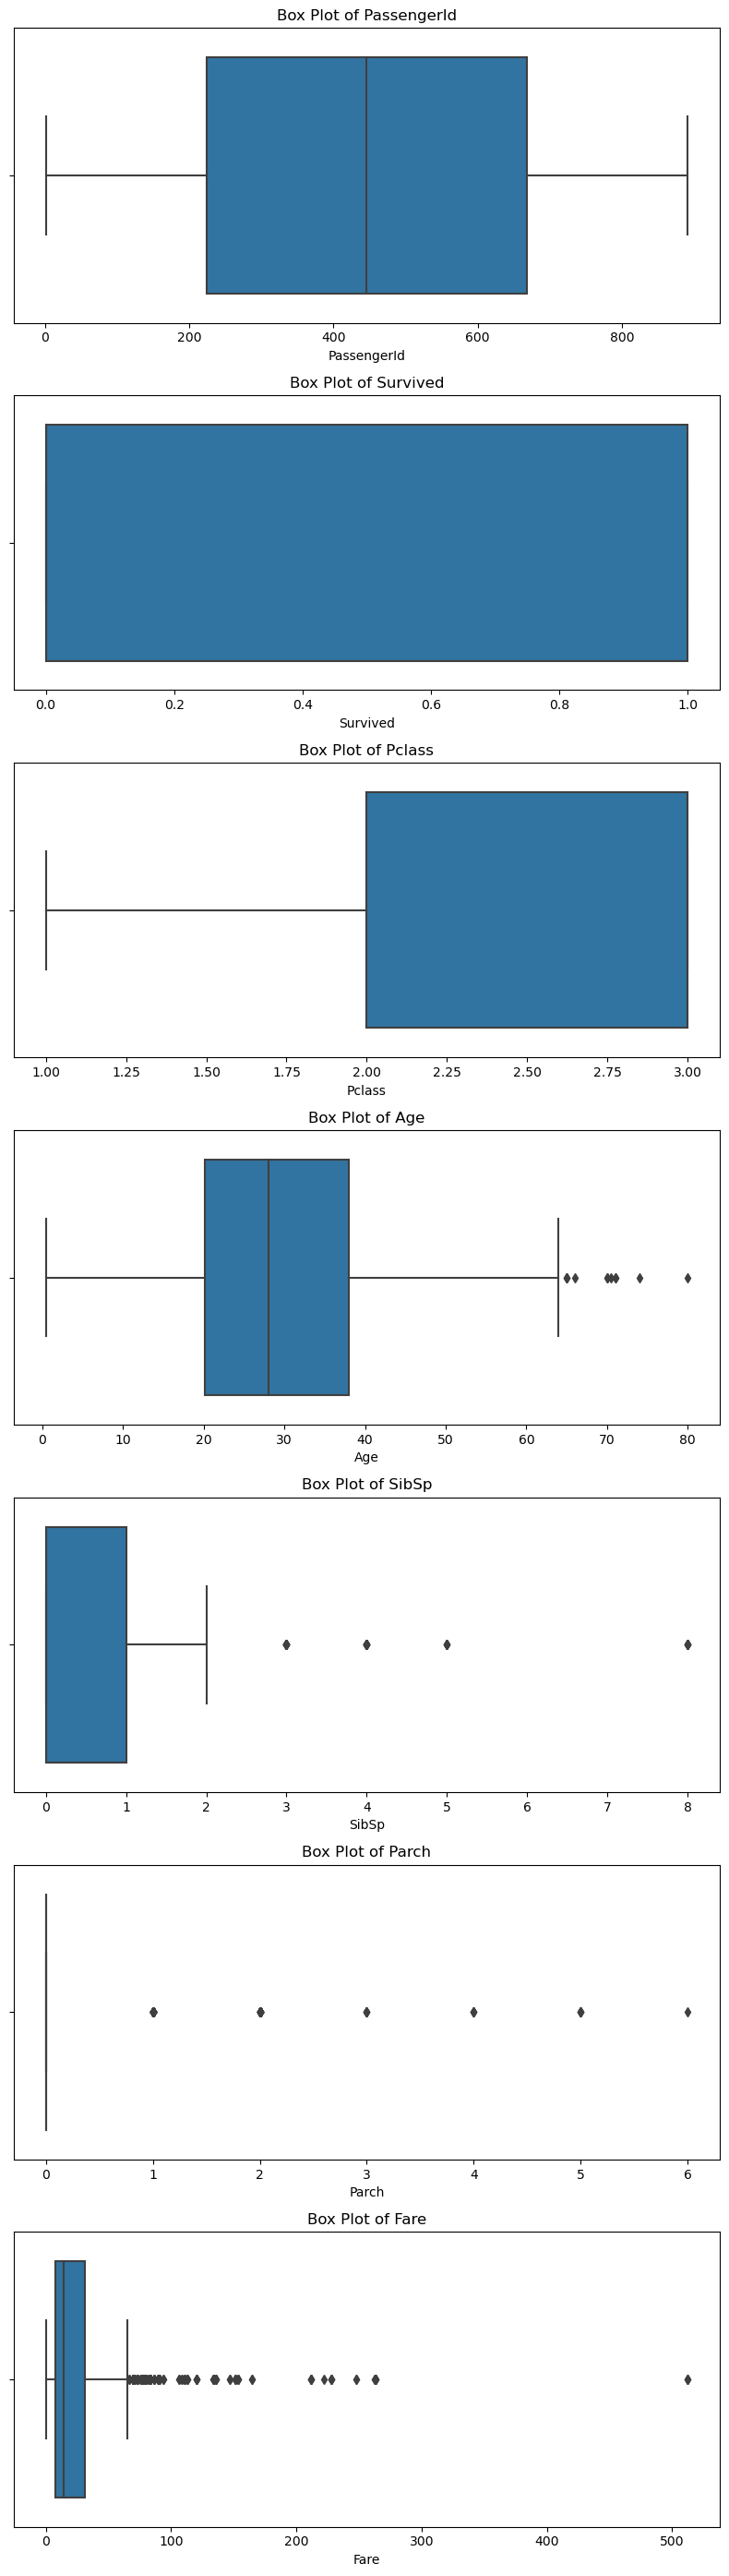

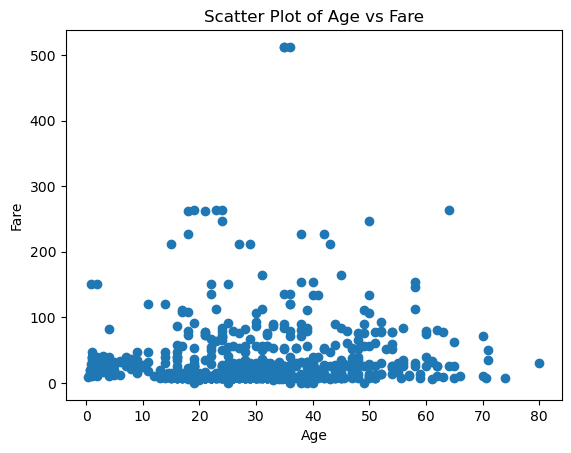

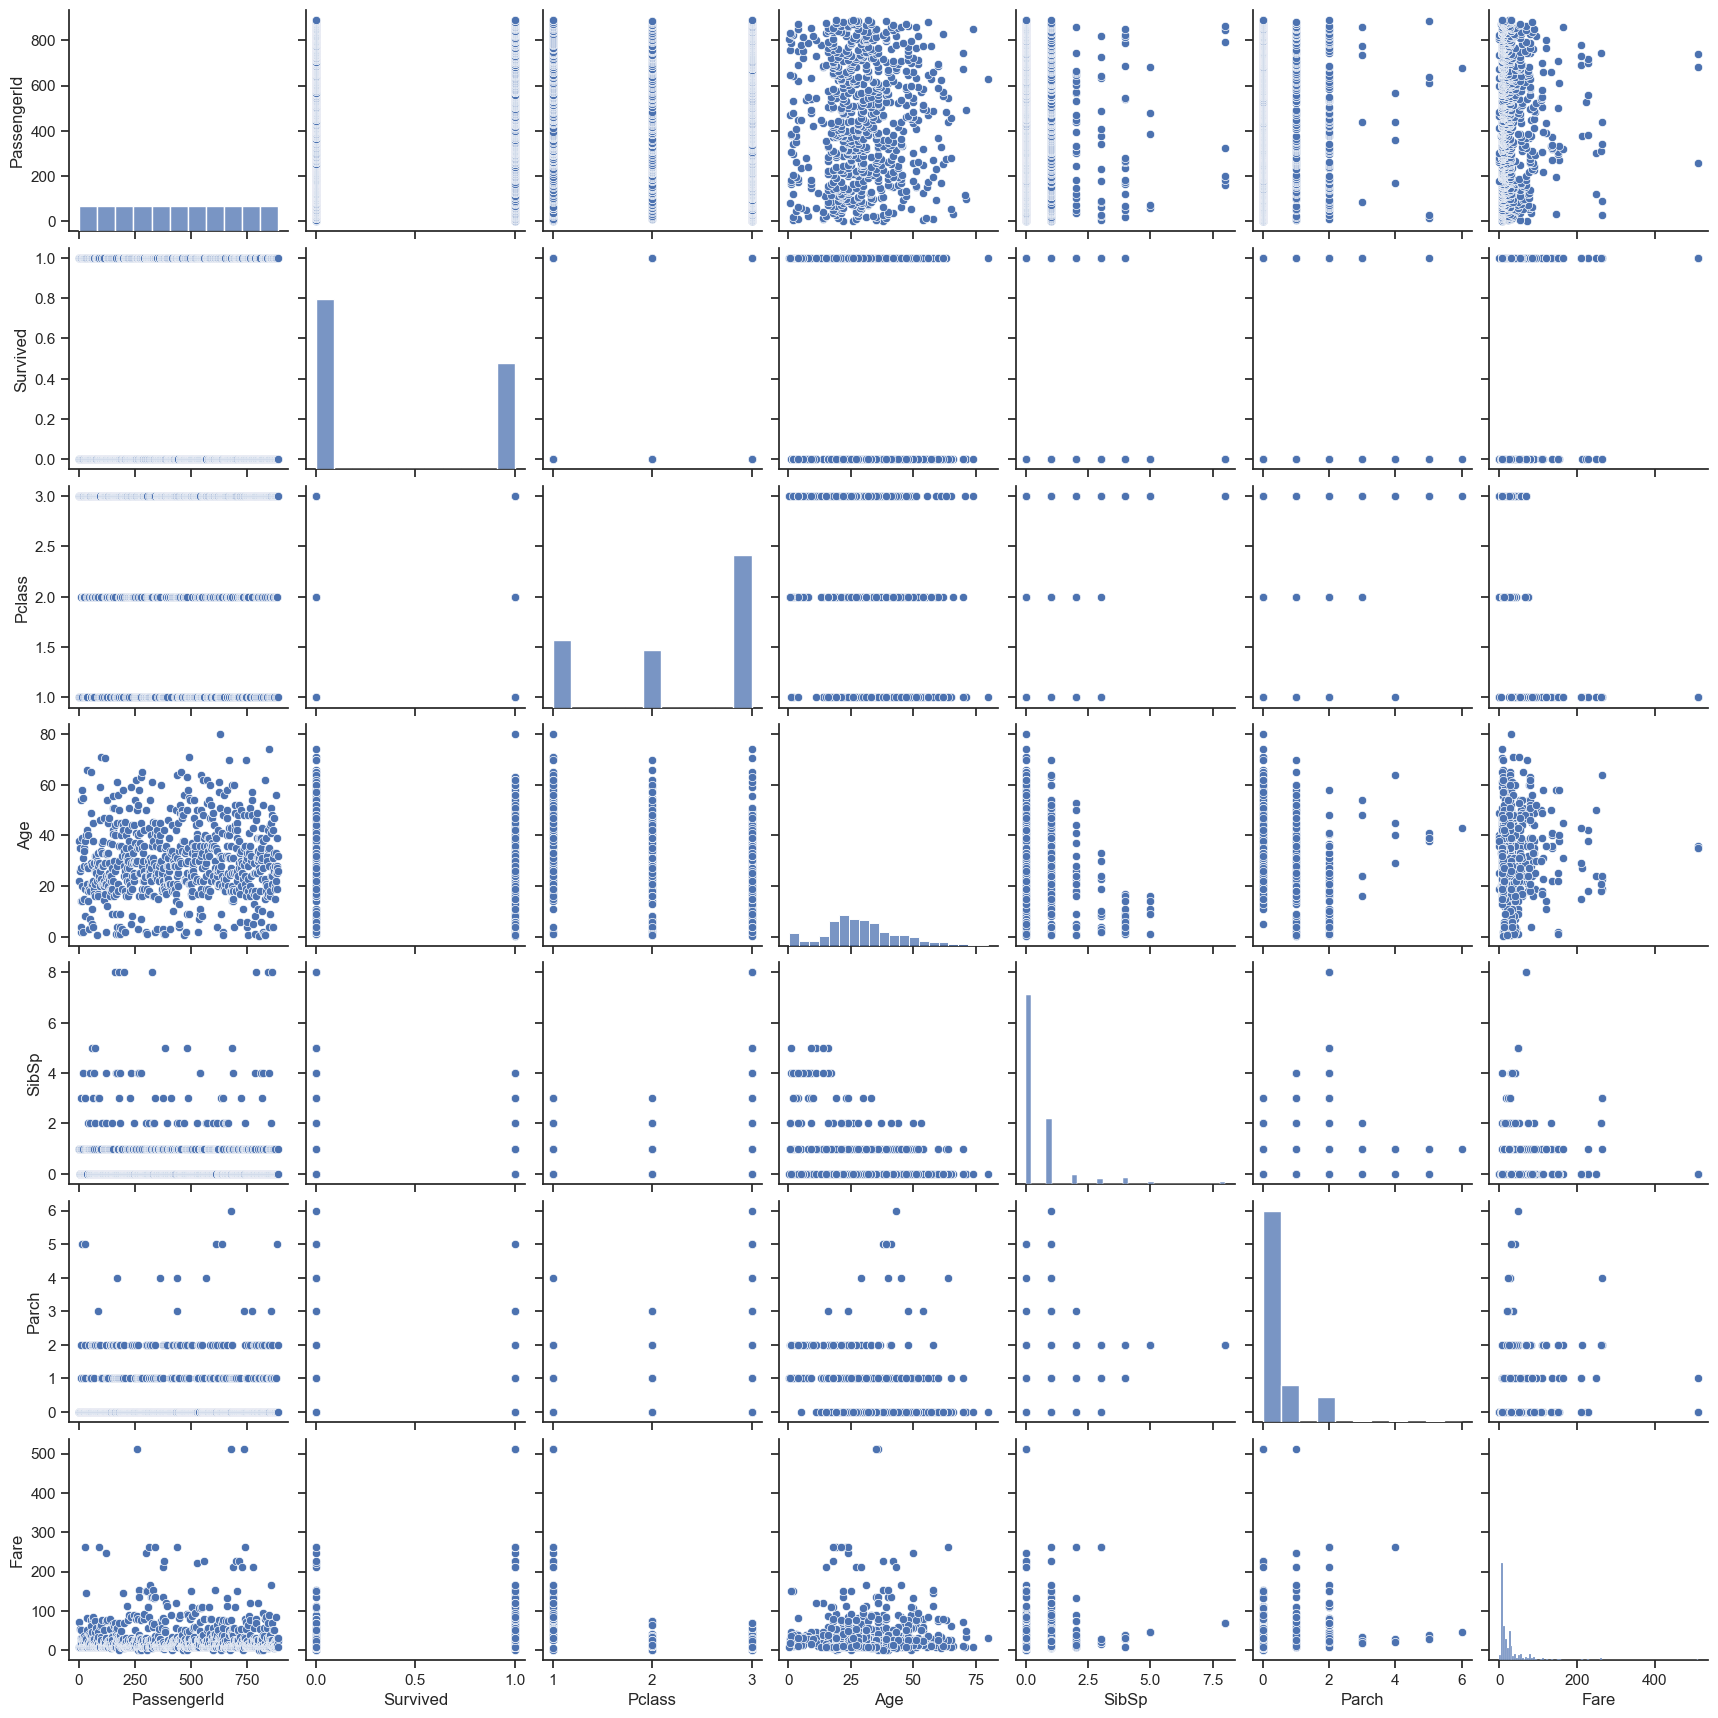

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

class Plot:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def box_plots(self):
        """Create box plots of all numeric features in the dataframe."""
        numeric_features = self.dataframe.select_dtypes(include=['int64', 'float64'])
        num_cols = numeric_features.columns

        num_plots = len(num_cols)
        fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 4 * num_plots))

        for i, col in enumerate(num_cols):
            sns.boxplot(data=self.dataframe, x=col, ax=axes[i])
            axes[i].set_title(f'Box Plot of {col}')

        plt.tight_layout()
        plt.show()

    def scatter_plot(self, x_col, y_col):
        """Create a scatter plot of two specified columns."""
        plt.scatter(self.dataframe[x_col], self.dataframe[y_col])
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(f'Scatter Plot of {x_col} vs {y_col}')
        plt.show()

    def scatter_matrix_with_histograms(self):
        """Create a scatter matrix with histograms and list columns excluded."""
        sns.set(style='ticks')
        numeric_features = self.dataframe.select_dtypes(include=['int64', 'float64'])
        excluded_cols = []

        try:
            sns.pairplot(data=numeric_features, diag_kind='hist')
        except Exception as e:
            excluded_cols = [col for col in numeric_features.columns if str(e) in str(numeric_features[col])]

        if excluded_cols:
            print(f"Columns excluded from the scatter matrix due to non-numeric data: {excluded_cols}")

        plt.show()

# Example usage on the Titanic dataset
import pandas as pd

# Load the Titanic dataset
titanic_df = pd.read_csv('./data/titanic.csv')

# Create a Plot instance with the Titanic dataset
plotter = Plot(titanic_df)

# Box plots of all numeric features
plotter.box_plots()

# Scatter plot of two columns (e.g., Age vs Fare)
plotter.scatter_plot('Age', 'Fare')

# Scatter matrix with histograms
plotter.scatter_matrix_with_histograms()